In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data_df = pd.read_csv('sign_mnist_train.csv')
test_data_df = pd.read_csv('sign_mnist_test.csv')

In [3]:
train_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_images = train_data_df.drop('label', axis=1).values.reshape(train_data_df.shape[0], 28, 28)
train_labels = train_data_df['label'].values

test_images = test_data_df.drop('label', axis=1).values.reshape(test_data_df.shape[0], 28, 28)
test_labels = test_data_df['label'].values

In [5]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [6]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255)

train_datagen.fit(train_images)

train_generator = train_datagen.flow(x=train_images,
                                     y=train_labels,
                                     batch_size=32,
                                     )

test_datagen = ImageDataGenerator(1/255)

test_generator = train_datagen.flow(x=test_images,
                                     y=test_labels,
                                     batch_size=32)

In [25]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.1)

history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30,
                    callbacks=early_stopping)

Epoch 1/30
858/858 [==============================] - 27s 31ms/step - loss: 0.4566 - accuracy: 0.9029 - val_loss: 0.6342 - val_accuracy: 0.8793 -
Epoch 2/30
858/858 [==============================] - 28s 32ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.3572 - val_accuracy: 0.9154
Epoch 3/30
858/858 [==============================] - 28s 33ms/step - loss: 0.0458 - accuracy: 0.9875 - val_loss: 0.4828 - val_accuracy: 0.9094
Epoch 4/30
858/858 [==============================] - 24s 28ms/step - loss: 0.0285 - accuracy: 0.9925 - val_loss: 0.6414 - val_accuracy: 0.9120
Epoch 5/30
858/858 [==============================] - 26s 30ms/step - loss: 0.0463 - accuracy: 0.9892 - val_loss: 0.5341 - val_accuracy: 0.9179
Epoch 6/30
858/858 [==============================] - 25s 29ms/step - loss: 0.0329 - accuracy: 0.9933 - val_loss: 1.0018 - val_accuracy: 0.9105
Epoch 7/30
858/858 [==============================] - 26s 31ms/step - loss: 0.0385 - accuracy: 0.9929 - val_loss: 0.4167 - val_accurac

In [28]:
import matplotlib.pyplot as plt

def create_val_plot(model_history):
        
    model_history = model_history.history

    # Training and validation loss plot
    loss_values = model_history['loss']
    val_loss_values = model_history['val_loss']

    epochs = range(1, len(loss_values) + 1)
    
    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
        
    # Training and validation accuracy plot
    acc = model_history['accuracy']
    val_acc = model_history['val_accuracy']

    epochs = range(1, len(acc) + 1)
    
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

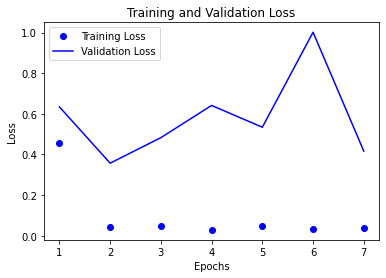

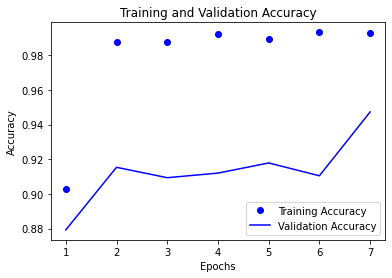

In [29]:
create_val_plot(history)

In [30]:
model.save('cnn_sign-language-mnist.h5')

In [31]:
import os

def check_model_size(model_path, print_size=True):
    # # Get file size in bytes for a given model
    size = os.stat(model_path).st_size
    if print_size == True:
        print('Model size in bytes ', size)
    else:
        return size

check_model_size('cnn_sign-language-mnist.h5')

Model size in bytes  10270088


In [32]:
from tensorflow.keras.utils import load_img

image = load_img('c.jpg', color_mode='grayscale', target_size=(28, 28))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

predictions = model.predict(input_arr)
print(predictions)

class_label = np.argmax(predictions)
print(class_label)

(1, 28, 28, 1)
[[4.36284964e-22 2.84009565e-16 3.95951633e-10 1.00884506e-07
  4.21133763e-07 9.47665967e-16 1.82989124e-09 9.97880995e-01
  1.10508129e-21 3.50268317e-13 9.96849849e-05 8.60393651e-18
  4.90240515e-10 2.01761466e-03 1.10042331e-08 1.33614120e-10
  2.76889289e-15 1.14063603e-07 1.01905107e-06 8.83858883e-21
  2.37432991e-15 3.81816128e-19 1.32629800e-20 4.30733635e-14
  4.15205110e-12 7.94899372e-19]]
7
